# Import the needed libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

# Sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

# Grid search
from tqdm.notebook import tqdm_notebook as tqdm

# SVM with Linear Dataset

We are going to work with the Iris Dataset

## Loading the data

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

## Training a classifier

In [ ]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


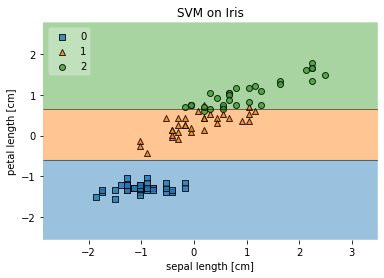

In [ ]:
# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Trying different combinations

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/p

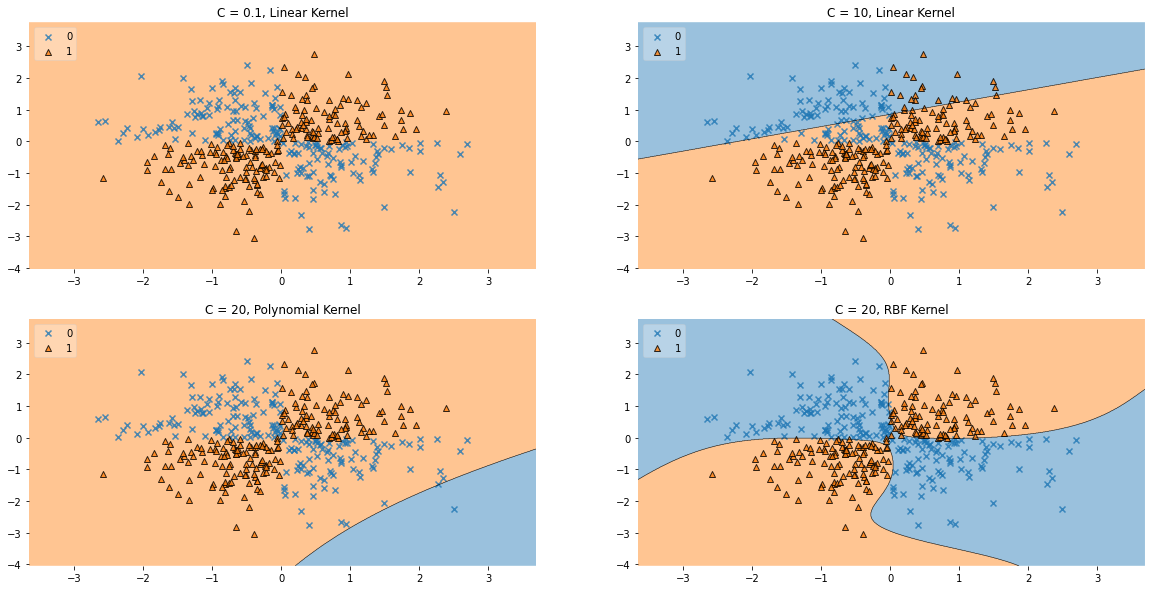

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle': '-'}

labels = ['C = 0.1, Linear Kernel', 'C = 10, Linear Kernel', 'C = 20, Polynomial Kernel', 'C = 20, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

# SVM with a non-linear Dataset

We are going to work with a synthatic dataset composed of the XOR gate

<img src = https://www.bogotobogo.com/python/scikit-learn/images/svm2/XOR-GATE.png>

## Generate the dataset

In [ ]:
# To reproduce the results
np.random.seed(0)
# Generate 500 integers
X_xor = np.random.randn(500, 2)
# Output
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0, dtype=int)
y_xor = np.where(y_xor, 0 , 1)

## Split the dataset

In [ ]:
X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)

X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

## Train Different Kernels

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/p

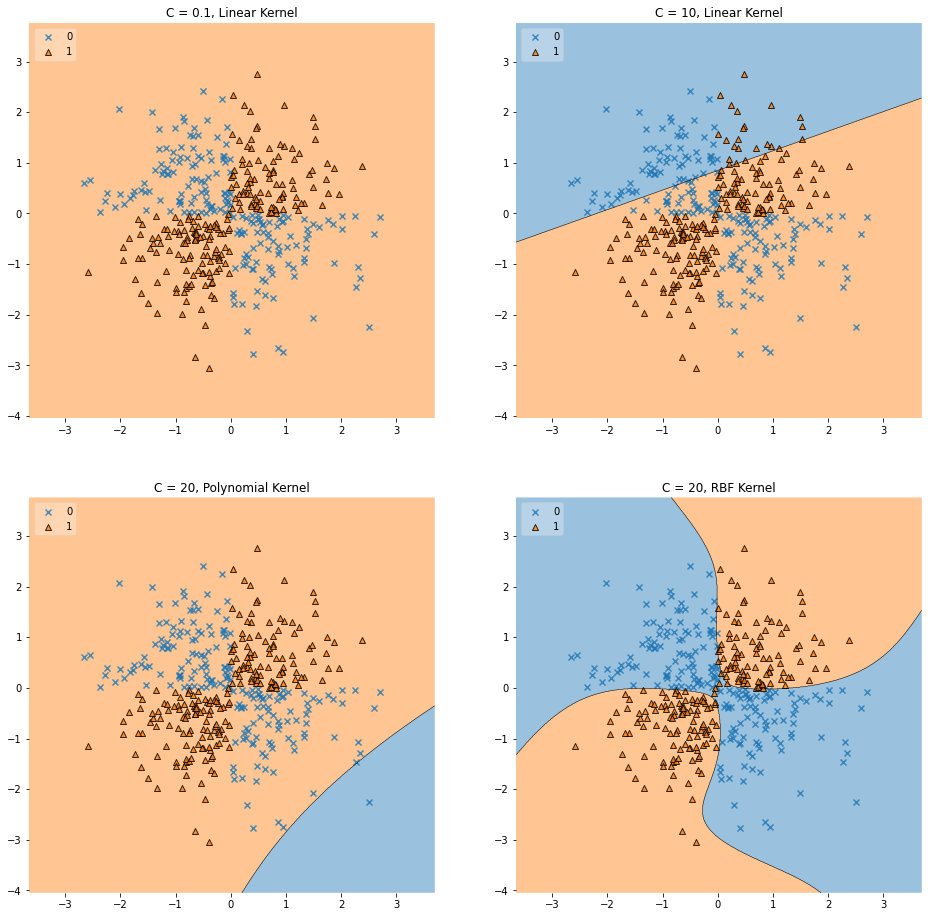

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle': '-'}

labels = ['C = 0.1, Linear Kernel', 'C = 10, Linear Kernel', 'C = 20, Polynomial Kernel', 'C = 20, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

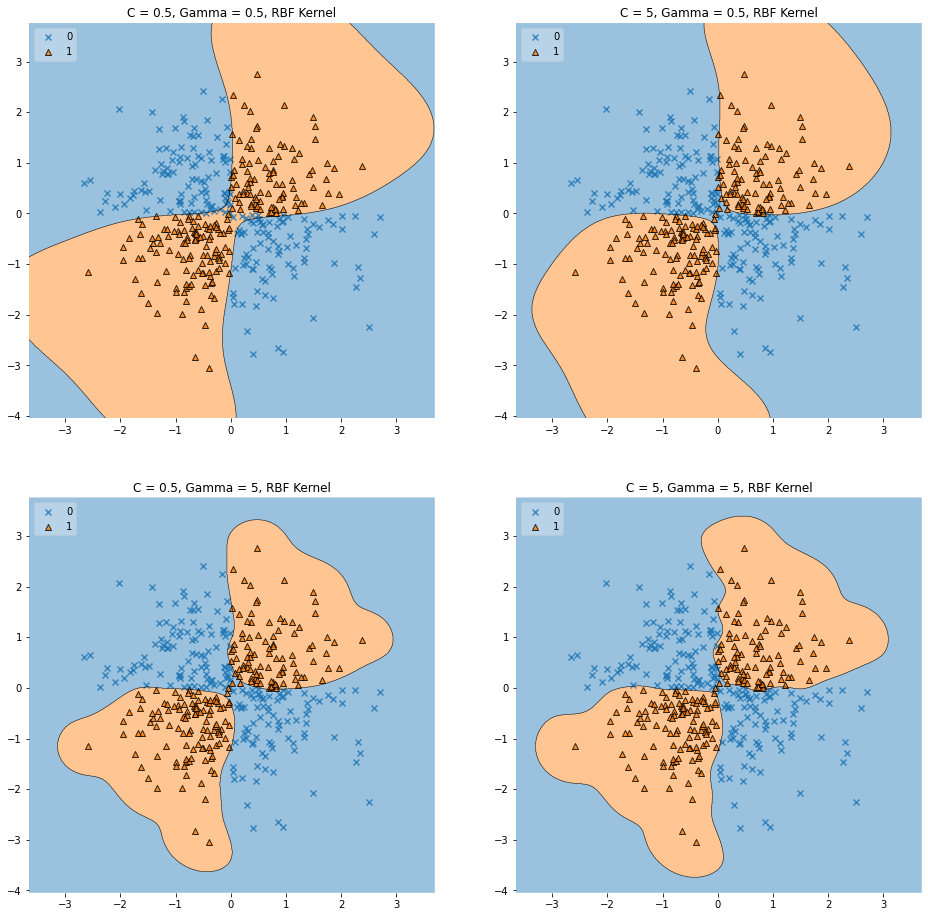

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 0.5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 5)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle': '-'}

labels = ['C = 0.5, Gamma = 0.5, RBF Kernel', 'C = 5, Gamma = 0.5, RBF Kernel', 'C = 0.5, Gamma = 5, RBF Kernel', 'C = 5, Gamma = 5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()